## Functions Present
### get_all_keys(obj): 
Input->Dictionary
Return->List of all keys and subkeys present in the dictionary
### parse_keys(obj,a=""): 
Input->List of keys and subkeys present,Initial border
Output->Print all the keys from previous function nested
### count_values(keyword,obj):
Input->Set of keys, A list of dictionary items
Output->A table detailing the percentage of dictionary items with the particular key (For multiple keys, the percentage is sorted in ascending order)
### number_of_unique_values(keywords,obj):
Input->Set of keys, A list of dictionary items
Output->A table detailing the number of unique values the particular key takes in the list of the dictionary items (For multiple keys, the percentage is count in ascending order)
### list_of_values(keyword,obj):
Input->Set of keys, A list of dictionary items
Output->The distinct values that each key takes in the obj set

# Initialisation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import operator
from tabulate import tabulate
listURL = "http://lp-sandbox.ekstep.org:8080/taxonomy-service/v2/analytics/content/list"
url = listURL
resp = requests.get(url).json()

# Get All Keys and Parse Them

In [2]:
#This gives the keys of any dictionary in sorted order
#It returns None value if it is not a dictionary and raises an error message
#If you wish to debug the code then pass a "verbose=true" argument
def get_keys(obj,**kwargs):
    a=False
    try:
        if(kwargs["verbose"]):
            a=True
    except KeyError:
        ;
    if(isinstance(obj,dict)):
        key_list=list(obj.keys())
        key_list.sort()
        if(len(key_list)>0):
            return key_list
        else:
            if(a):
                print("No keys. Empty dictionary")
            return
    else:
        if(a):
            print("This is not a dictionary")
        return

In [3]:
print(get_keys(resp))

['id', 'params', 'responseCode', 'result', 'ts', 'ver']


In [4]:
#This gets all the keys of the object with corresponding subkeys
def get_all_keys(obj):
    x=[]
    if(isinstance(obj,dict)):
        a=get_keys(obj)
        if(a!=None):
            for i in a:
                y=[]
                x.append(i)
                b=get_all_keys(obj[i])
                if(b!=None):
                    for j in b:
                        try:
                            y.index(j)
                        except ValueError:
                            y.append(j)
                if(len(y)>0):
                    x.append(y)
    elif(isinstance(obj,list)):
        y=[]
        for i in obj:
            a=get_all_keys(i)
            if(a!=None):
                for j in a:
                    try:
                        y.index(j)
                    except ValueError:
                        y.append(j)
        if(len(y)>0):
            x=y
    if(len(x)>0):
        return x
    else:
        return            

In [5]:
#This prints the keys obtained from above in a nested fashion
def parse_keys(obj,a=""):
    for i in obj:
        if(isinstance(i,list)):
            b="\t"+a
            parse_keys(i,b)
        else:
            print(a,i)

In [6]:
parse_keys(get_all_keys(resp),"")

 id
 params
	 err
	 errmsg
	 msgid
	 resmsgid
	 status
 responseCode
 result
	 contents
		 ageGroup
		 code
		 concepts
		 contentType
		 createdOn
		 developer
		 downloadUrl
		 gradeLevel
		 idealScreenDensity
		 idealScreenSize
		 identifier
		 language
		 lastPublishedOn
		 lastUpdatedOn
		 license
		 mediaType
		 mimeType
		 name
		 os
		 osId
		 owner
		 pkgVersion
		 portalOwner
		 publisher
		 size
		 source
		 status
		 tags
		 visibility
		 artifactUrl
		 description
		 genre
		 s3Key
		 subject
		 appIcon
		 popularity
		 Subject
		 activity_class
		 communication_scheme
		 grayScaleAppIcon
		 launchUrl
		 posterImage
		 format
		 filter
		 languageCode
		 learningObjective
		 author
		 domain
		 illustrators
		 keywords
		 objectsUsed
		 text
		 voiceCredits
		 template
		 collaborators
		 learnerLevel
		 purpose
		 imageCredits
		 soundCredits
		 templateType
		 lastPublishDate
		 appIconLabel
		 copyright
		 cost
		 model_sample
		 templateName
 ts
 ver


# Explore The Keys in the Contents List

In [7]:
contentList = resp["result"]["contents"]
content_keys=get_all_keys(contentList)

### Get Number of Records in Which Fields of a Key are Not Empty 

In [8]:
#This counts the number of the items in the list which have these keywords defined
def count_values(keyword,obj):
    l=len(obj)
    x=[]
    for k in keyword:
        count_total=0
        for i in obj:
            try:
                if(isinstance(i[k],list)):
                    if(len(i[k])!=0):
                        count_total+=1
                else:
                    count_total+=1
            except KeyError:
                ;
        x.append([k,count_total/l*100])
    x=sorted(x, key=operator.itemgetter(1),reverse=True)
    x_key=[item[0] for item in x]
    x_percentage=[item[1] for item in x]
    pos = [10*i for i in range(len(x))]
    plt.barh(pos, x_percentage, align='center')
    #plt.yticks(pos, x_key,size="small")
    plt.yticks([])
    plt.show()
    print(tabulate(x, headers=['Keyword', 'Percentage'], tablefmt='orgtbl'))

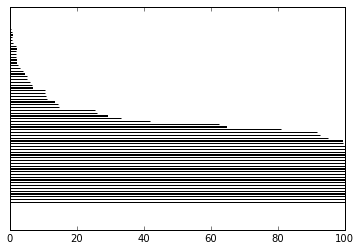

| Keyword              |   Percentage |
|----------------------+--------------|
| ageGroup             |   100        |
| code                 |   100        |
| contentType          |   100        |
| developer            |   100        |
| gradeLevel           |   100        |
| idealScreenDensity   |   100        |
| idealScreenSize      |   100        |
| identifier           |   100        |
| language             |   100        |
| lastUpdatedOn        |   100        |
| license              |   100        |
| mediaType            |   100        |
| mimeType             |   100        |
| name                 |   100        |
| os                   |   100        |
| owner                |   100        |
| portalOwner          |   100        |
| publisher            |   100        |
| source               |   100        |
| status               |   100        |
| visibility           |   100        |
| osId                 |    99.5772   |
| lastPublishedOn      |    99.3658   |


In [9]:
count_values(content_keys,contentList)

### Get Number of Unique Values

In [10]:
def number_of_unique_values(keywords,obj):
    r=[]
    for k in keywords:
        x=[]
        for i in obj:
            try:
                if(isinstance(i[k],list)):
                    for j in i[k]:
                        try:
                            x.index(j)
                        except ValueError:
                            x.append(j)
                else:
                    try:
                        x.index(i[k])
                    except ValueError:
                        x.append(i[k])
            except KeyError:
                ;
        r.append([k,len(x)])
    r=sorted(r, key=operator.itemgetter(1))
    r_key=[item[0] for item in r[14:40]]
    r_percentage=[item[1] for item in r[14:40]]
    pos = [10*i for i in range(len(r_key))]
    plt.barh(pos, r_percentage, align='center')
    plt.yticks(pos, r_key,size="small")
    plt.show()
    print(tabulate(r, headers=['Keyword', 'Number of Unique Values'], tablefmt='orgtbl'))

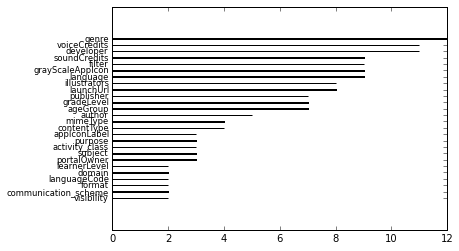

| Keyword              |   Number of Unique Values |
|----------------------+---------------------------|
| idealScreenDensity   |                         1 |
| idealScreenSize      |                         1 |
| license              |                         1 |
| status               |                         1 |
| Subject              |                         1 |
| learningObjective    |                         1 |
| templateType         |                         1 |
| copyright            |                         1 |
| cost                 |                         1 |
| model_sample         |                         1 |
| templateName         |                         1 |
| mediaType            |                         2 |
| os                   |                         2 |
| source               |                         2 |
| visibility           |                         2 |
| communication_scheme |                         2 |
| format               |                      

In [11]:
number_of_unique_values(content_keys,contentList)

### Dividing the Keys (Basis their Values and Number of Distinct Values)

In [12]:
#Useful and Few Distinct Values
keys_useful_few=["ageGroup","contentType","gradeLevel","languageCode","language","developer","publisher","author",
        "illustrators","genre","subject","Subject","domain","popularity","filter"]
#Merge language and languageCode
#Merge subject,domain and Subject

In [13]:
#Useful But Many Distinct Values
keys_useful_many=["owner","concepts","objectsUsed","keywords","tags","description","text"]

In [14]:
#Not useful
keys_not_useful=["learningObjective","status","license","osId","visibility","activity_class","format","communication_scheme",
        "idealScreenSize","idealScreenDensity","mimeType","code","size","name","downloadUrl","identifier""lastUpdatedOn",
        "lastPublishedOn","createdOn","artifactUrl","s3Key","appIcon""template","collaborators","lastPublishDate",
        "appIconLabel","copyright","model_sample"]

In [15]:
#Not sure: Could be useful in the future
keys_possible_future_use=["portalOwner","os","source","mediaType","pkgVersion","launchUrl","soundCredits","imageCredits",
                          "voiceCredits","learnerLevel","purpose","templateType","templateName","cost"]
# learnerLevel has only two duplicate keys currently
# purpose has only three duplicate keys but may be useful in future
# merge templatename and templatetype

### Display Values of the Useful/Possibly Useful Keys

In [16]:
def list_of_values(keyword,obj):
    for k in keyword:
        x=[]
        for i in obj:
            try:
                if(isinstance(i[k],list)):
                    for j in i[k]:
                            try:
                                x.index(j.lower())
                            except ValueError:
                                x.append(j.lower())
                elif(isinstance(i[k],str)):
                    try:
                        x.index(i[k].lower())
                    except ValueError:
                        x.append(i[k].lower())
                else:
                    try:
                        x.index(i[k])
                    except ValueError:
                        x.append(i[k])
            except KeyError:
                ;
        print(k)
        parse_keys(x,"")

In [17]:
list_of_values(keys_useful_few,contentList)

ageGroup
 5-6
 <5
 6-7
 7-8
 8-10
 >10
 other
contentType
 story
 game
 worksheet
 collection
gradeLevel
 grade 1
 kindergarten
 grade 2
 grade 3
 grade 4
 grade 5
 other
languageCode
 en
 hi
language
 english
 hindi
 kannada
 other
 marathi
 bengali
 telugu
developer
 ekstep
 gwl
 keepworks
 pratham
 center for game science
 filament games
 goodwork labs
 glasslabs / gwl
 akshara
publisher
 ekstep
 twin sisters, mangoreader
 pratham books, mangoreader
 aadarsh publication, mangoreader
 mangoreader
 twin sisters, tara larsen chang
author
 kim mitzo thompson, karen mitzo hilderbrand
 anupa lal
 kim thompson, bailey thompson
 suvarna bhajanka
 dugald a steer
illustrators
 roberta collier-morales
 ron kauffman
 jackie binder
 suvidha mistry
 dorothy stott
 mangoreader
 nayna vispute
 tara larsen chang
genre
 picture books
 chapter books
 flash cards
 serial books
 alphabet books
 folktales
 fiction
 non-fiction
 poems/rhymes
 plays
 comics
 words
subject
 literacy
 numeracy
 domain
Subjec

In [18]:
list_of_values(keys_useful_many,contentList)

owner
 ekstep
 kim mitzo thompson, karen mitzo hilderbrand
 80
 246
 anupa lal
 kim thompson, bailey thompson
 suvarna bhajanka
 215
 dugald a steer
 104
 274
 210
 pratham
 275
 center for game science
 ek step
 239
 345
 akshara
 373
 374
 346
 133
 375
 142
 216
 363
concepts
 lo51
 lo52
 num:c1:sc2:mc12
 lo6
 lo41
 domain_13578
 num:c3:sc2
 num:c4:sc4:mc8
 test_concept
 lo37
 lo25
 lo24
 lo1
 lo46
 lt11
 lo3
 lo16
 lo15
 num:c3:sc2:mc3
 domain_13219
 num:c4:sc4:mc7
 lo39
 domain_13283
 domain_13577
 lo28
 domain_13544
 lo10
 num:c2:sc1:mc2
 num:c2:sc1:mc3
 num:c2:sc1
 num:c2:sc1:mc9
 num:c2:sc2:mc7
 num:c1:sc2:mc6
 lo31
 lo7
objectsUsed
 adventure
 animals
 love
 nature
 fun
 education
 mangosense
 life
 history
 moral
 twin sister
 kid
 stories
 israel
 words
 daily
 learning
 sight
 baby
 children
 e-books
 kids
 educational
 isbn:9781599221298
 twin sisters
 grandma
 parents
 grandparents
 family
 home
 father
 mother
 brother
 cooking
 food
 isbn:9781575833231
 pratham books
 e

In [19]:
list_of_values(keys_possible_future_use,contentList)

portalOwner
 ekstep
 mangosense
 ncert
os
 all
 android
source
 ekstep
 mangoreader
mediaType
 content
 collection
pkgVersion
 1
 6.0
 12.0
 4.0
 18.0
 17.0
 11.0
 13.0
 3
 27.0
 7.0
 15.0
 2.0
 5.0
 20.0
 8.0
 9.0
launchUrl
 org.ekstep.quiz.app
 org.ekstep.aser.lite
 air.edu.washington.cs.treefrog
 org.ekstep.delta
 org.ekstep.cog.flankers
 org.ekstep.aser
 org.ekstep.num.scrn.basic
 org.ekstep.lit.scrnr.kan.basic
soundCredits
 vinu
 mahesh
 jitu
 ramesh
 suresh
 ekstep
 hemalatha ganesh
 radhika p
imageCredits
 vinu
 mahesh
 jitu
 ramesh
 suresh
 ekstep
 swapnil anil deopurkar
 external testing vendor
 alia ali
 maneesh pandey
 hemalatha ganesh
 radhika p
 wiehan de jager
 weihan de jager
 paluru abhign sai
 aditya r
 swapnil deopurkar
 1
 t
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
voiceCredits
 mangoreader
 vinu
 mahesh
 jitu
 ramesh
 suresh
 noel almeida
 swapnil deopurkar
 kameswararao bh
 aditya r
learnerLevel
 beginner level
 beginner
purpose
 assessment
 assessment 
 screener
t